Started June 5, 2017

In [1]:
from __future__ import division

import sys
sys.path.append('../experimental')
import substrings
import match_overlaps
sys.path.append('../common')
import util

## Does a Threshold Function Exist?
It would be nice to have a better sense that a threshold function exists before more time is devoted into finding it. Originally I thought that simulations could be done in order to find if there was a threshold function; however, I realized this would most likely be too costly to get accurate probabilities over the possible values of $k$ for large $n$.

Therefore, it is probably best to analyze some of the expressions that have been derived in the past that are close to what the true probability is. Recall that one expression that worked somewhat well was...

$$
P(\textrm{k-length prefix is repeated}) = 1 - \left(1 - P\left(G[i] \cap G[j] \neq \emptyset \right)^k \right)^{n-k}
$$

Where $n$ is the length of the entire generalized string and...

$$
P\left(G[i] \cap G[j] \neq \emptyset \right) = \frac{4^a - 3^a}{\left(2^a - 1\right)^2}
$$

This expression was found by assuming that there was independence both when substrings overlap and when comparing the substrings to the prefix.

Plotting this...

In [6]:
def get_prob_func(a, n):
    """Get probability function for a fixed alphabet size and string length"""
    return lambda k: substrings.get_theoretical_substring_prob(k, a, n)

def plot_varying_sizes(alph_sizes, string_sizes):
    """For each string size make a plot with all alph sizes."""
    for n in string_sizes:
        func_map = {get_prob_func(a, n): "Alphabet: %d" % a for a in alph_sizes}
        util.plot_many(range(1, n + 1), func_map)

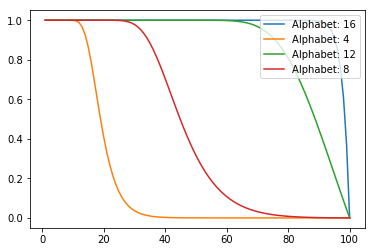

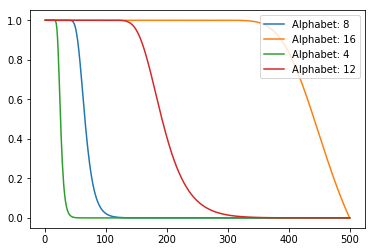

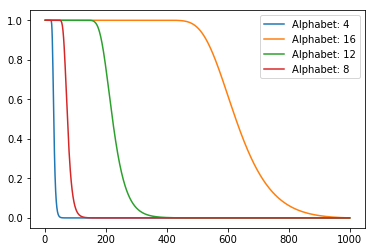

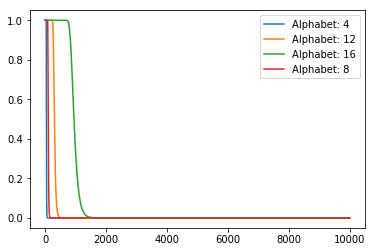

In [10]:
# Alphabet sizes to plot
ALPHABET_SIZES = [4, 8, 12, 16]
# String sizes to check
STRING_SIZES = [100, 500, 1000, 10000]

plot_varying_sizes(ALPHABET_SIZES, STRING_SIZES)

Although this is not the exact probability that we are looking for, it is pretty close from what was seen in previous notebooks. This makes me think that there is definitely a threshold function because there seems to be a steep drop in probability regardless of the alphabet size (as long as $n$ is big enought).

## More Overlapping String Probabilities

### Setup

In order to do more sophisticated analysis we will need to know more probabilities for the different cases of overlapping substrings. The next easiest one I can think of is that we are checking to see if two different substrings match with a prefix and the two substrings overlap exactly at their midpoints. In other words, if we are checking substrings of length $k$ (where here we impose $k$ to be even) the two substrings have overlap $\gamma = \frac{k}{2}$. 

Based on this the prefix can also be split into two halfs, let's denote these two halfs as $\mathcal{P}_1$ and $\mathcal{P}_2$. Additionaly, we are left with three different cases of the substring: the left substrings where no overlap occurs ($\mathcal{S}_1$), the part of the two substrings where there is overlap ($\mathcal{S}_2$), and the part of the right substring where there is no overlap ($\mathcal{S}_2$). Note that each of these substrings have size $\gamma = \frac{k}{2}$.

To derive the probability we note the following must be true:
1. There is a "match" (i.e. all sets share at least one element) between $\mathcal{S}_1$ and $\mathcal{P}_1$.
2. There is a "match" between $\mathcal{S}_3$ and $\mathcal{P}_2$.
3. $\mathcal{S}_2$ has a "match" with both $\mathcal{P}_1$ and $\mathcal{P}_2$.

### Deriving Probability

Using these probabilities and a similar total law of probability approach that I have been using in the past, we can attempt to derive a probability that the two overlapping substrings have a match with the prefix. Condiser the case where each substring/prefix half consists of just one set of letters (i.e. $\gamma = 1$). In the case that this happens, denote the probability of the substrings matching with the prefix as $p$. Note then for an arbitrary $\gamma$ that the probability of the two substrings matching the prefix is $p^\gamma$.

In the following we calculate $p$. Note that $A == B$ here will denote that there is a match between substrings $A$ and $B$.

$$
p = \sum_{\mathcal{P}_1, \mathcal{P}_2} P\left(\mathcal{S}_1 == \mathcal{P}_1, \mathcal{S}_2 == \mathcal{P}_1, \mathcal{S}_2 == \mathcal{P}_2, \mathcal{S}_3 == \mathcal{P}_2 | \mathcal{P}_1, \mathcal{P}_2\right) P\left(\mathcal{P}_1, \mathcal{P}_2\right)
$$

By conditional independence and by the fact that we choose each letter set with uniform probability...

$$
p = P\left(\mathcal{P}_1\right) P\left(\mathcal{P}_2\right) \sum_{\mathcal{P}_1, \mathcal{P}_2} P\left(\mathcal{S}_1 == \mathcal{P}_1 | \mathcal{P}_1\right) P\left(\mathcal{S}_3 == \mathcal{P}_2 | \mathcal{P}_2\right) P\left(\mathcal{S}_2 == \mathcal{P}_1, \mathcal{S}_2 == \mathcal{P}_2 | \mathcal{P}_1, \mathcal{P}_2\right)
$$

The first two tems in the sum have been computed previously. That is,

$$
P\left(\mathcal{S}_i == \mathcal{P}_j | \mathcal{P}_j\right) = \left(1 - \frac{2^{a - |\mathcal{P}_j[1]|} - 1}{2^a - 1}\right)
$$

To compute the last term in the sum note that (where $!==$ is used to denote there is not a match),

$$
P\left(\mathcal{S}_2 == \mathcal{P}_1, \mathcal{S}_2 == \mathcal{P}_2 | \mathcal{P}_1, \mathcal{P}_2\right) = 1 - P\left(\mathcal{S}_2 !== \mathcal{P}_1 \cup \mathcal{S}_2 !== \mathcal{P}_2 | \mathcal{P}_1, \mathcal{P}_2\right)
$$

$$
= 1 - \left( P\left(\mathcal{S}_2 !== \mathcal{P}_1 | \mathcal{P}_1\right) + P\left(\mathcal{S}_2 !== \mathcal{P}_2 | \mathcal{P}_2\right) - P\left(\mathcal{S}_2 !== \mathcal{P}_1, \mathcal{S}_2 !== \mathcal{P}_2 | \mathcal{P}_1, \mathcal{P}_2\right) \right)
$$

$$
= 1 - \left(\frac{2^{a - |\mathcal{P}_1[1]|} - 1 + 2^{a - |\mathcal{P}_2[1]|} - 1 - \left(2^{a - |\mathcal{P}_1[1] \cup \mathcal{P}_2[1]|} - 1\right)}{2^a - 1}\right)
$$

$$
= 1 - \frac{2^a \left(2^{-|\mathcal{P}_1[1]|} + 2^{-|\mathcal{P}_1[1]|} - 2^{-|\mathcal{P}_1[1] \cup \mathcal{P}_2[1]|}\right) - 1}{2^a - 1}
$$

Putting this all together...

$$
p = \left(\frac{1}{2^a - 1}\right)^5 \sum_{\mathcal{P}_1, \mathcal{P}_2} \left(2^a - 2^{a - |\mathcal{P}_1[1]|}\right) \left(2^a - 2^{a - |\mathcal{P}_2[1]|}\right) \left(2^a - 2^a \left(2^{-|\mathcal{P}_1[1]|} + 2^{-|\mathcal{P}_1[1]|} - 2^{-|\mathcal{P}_1[1] \cup \mathcal{P}_2[1]|}\right)\right)
$$

$$
p = \left(\frac{1}{2^a - 1}\right)^5 2^{3a} \sum_{\mathcal{P}_1, \mathcal{P}_2} \left(1 - 2^{- |\mathcal{P}_1[1]|}\right) \left(1 - 2^{- |\mathcal{P}_2[1]|}\right) \left(1 - 2^{-|\mathcal{P}_1[1]|} - 2^{-|\mathcal{P}_1[1]|} + 2^{-|\mathcal{P}_1[1] \cup \mathcal{P}_2[1]|}\right)
$$

Unlike before, it is difficult to simplify this summation. This is because the $\mathcal{P}_1[1] \cup \mathcal{P}_2[1]$ term makes it necessary to know the actual elements in the two letter sets, rather than just keeping track of their size. I have not thought of a solution for this yet.

### Testing via Simulation

In [12]:
def get_theor_p(a):
    """Gives theoretical p for a given a."""
    return match_overlaps.get_half_overlap(1, a)

def get_sim_p_func(trials):
    """Gives function that will give simulated p after given number of trials."""
    return lambda a: match_overlaps.sim_half_overlap(1, a, trials)

def get_diff_func(trials):
    """Gives function that will give relative error."""
    def get_relative_diff(a):
        theor = match_overlaps.get_half_overlap(1, a)
        sim = match_overlaps.sim_half_overlap(1, a, trials)
        return (sim - theor) / theor
    return get_relative_diff

def plot_p(a_range, trials):
    """Plot the value of p as derived above."""
    func_map = {get_theor_p: 'Theoretical', get_sim_p_func(trials): 'Simulated'}
    util.plot_many(a_range, func_map)
    
def plot_diff(a_range, trials):
    """Plot the relative difference for p between simulated and theoretical."""
    func_map = {get_diff_func(trials): 'Relative Difference'}
    util.plot_many(a_range, func_map)

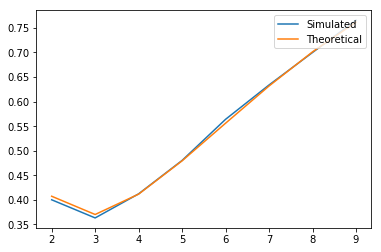

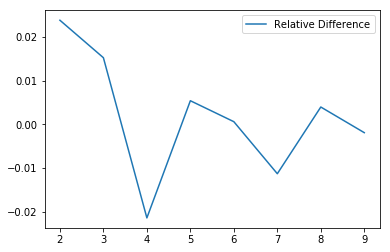

In [17]:
# Range of alphabet sizes to consider.
A_RANGE = range(2, 10)
# Number of trials to be performed on the simulation.
TRIALS = 10000

plot_p(A_RANGE, TRIALS)
plot_diff(A_RANGE, TRIALS)

The first plot above shows the simulated probability and theoretical probability over different sizes of alphabets. The second plot shows the relative error between the two probabilities. These plots suggest that the derived probability seems to be correct.

# Redefining $Y_k$

### Last time...

In the last notebook, I started looking at how to use $Y_k$ similar to in the k-mer paper in order to use the first moment method. The problem was that the lower bound that I got that the first moment method provides is 0. Therefore, I try to increase the resolution on $Y_k$ to see if a better lower bound can be achieved.

### Redefining $Y_k$

Now let $Y_k$ be the following:

$$
Y_k = \sum_{i} ind\left(G[1:k] == G[i:k]\right)
$$

This is the same as last time; however, now we now have $k < i < n - \frac{k}{2}$ and $i$ is incremented in steps of $\frac{k}{2}$. In other words, we sum over all of the substrings that do not overlap with the prefix but overlap with each other at the midway point. Another restriction for this definition is that $k$ must be even to ensure that the substrings overlap with the midpoint exactly.

### Recalculating the First Moment Method Lower Bound

To redo the calculations we must first consider $Y_k^2$. Here there are three different scenarios to consider.

$$
Y_k^2 = \sum_{i, j} ind\left(G[1:k] == G[i:k]\right) ind\left(G[1:k] == G[j:k]\right)
$$

Here there are three different scenarios to consider:
1. $i = j$: There are $\lfloor \frac{2n}{k} \rfloor - 2$ instances of this.
2. The two different substrings intersect. There are $2\left(\lfloor \frac{2n}{k} \rfloor - 3\right)$ instances of this because there are $\lfloor \frac{2n}{k} \rfloor - 3$ substrings that have an overlap on their right side. Multiply by two since can interchange $i$ and $j$.
3. Two two different substrings do not intersect. In this case there are $2\left(2\left(\lfloor \frac{2n}{k} \rfloor - 3\right) + \left(\lfloor \frac{2n}{k} \rfloor - 4\right) \left(\lfloor \frac{2n}{k} \rfloor - 5\right)\right)$. The first term in this accounts for picking an edge substring and then picking any other substring besides the one that overlaps with it. In the second term we pick any substring except for the two edge substrings and then pick any substring except for the one we just picked or the two that overlap with it. Again, the times 2 is to account for the interchange between $i$ and $j$.

Now,

$$
\frac{E[Y_k^2]}{E[Y_k]^2} = \frac{1}{\left(\lfloor \frac{2n}{k} \rfloor - 2\right) c_2^k} + \frac{2\left(\lfloor \frac{2n}{k} \rfloor - 3\right)p}{\left(\lfloor \frac{2n}{k} \rfloor - 2\right) c_2^k} + \frac{2\left(2\left(\lfloor \frac{2n}{k} \rfloor - 3\right) + \left(\lfloor \frac{2n}{k} \rfloor - 4\right) \left(\lfloor \frac{2n}{k} \rfloor - 5\right)\right) c_{1,2}^k}{\left(\lfloor \frac{2n}{k} \rfloor - 2\right) c_2^k}
$$

### Analysis of Lower Bound
Just off of observation this will still not give us what we want. This is because we still get the $\frac{c_{1,2}}{c_2^2} \ge 1$ term multiplied by something of $O(1)$. Thus the $\left(\frac{c_{1,2}}{c_2^2}\right)^k$ term will still drive this to infinity. Note this term is associated to where there is no overlap in the two substrings. Thus, in order to get into a situation where this is not a problem, we must refine $Y_k$ so that the order of terms that have two substrings that do not overlap in $Y_k$ is less than the order of the overall number of terms.